In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('music_spotify.csv', index_col=0)

In [3]:
df.head(2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino


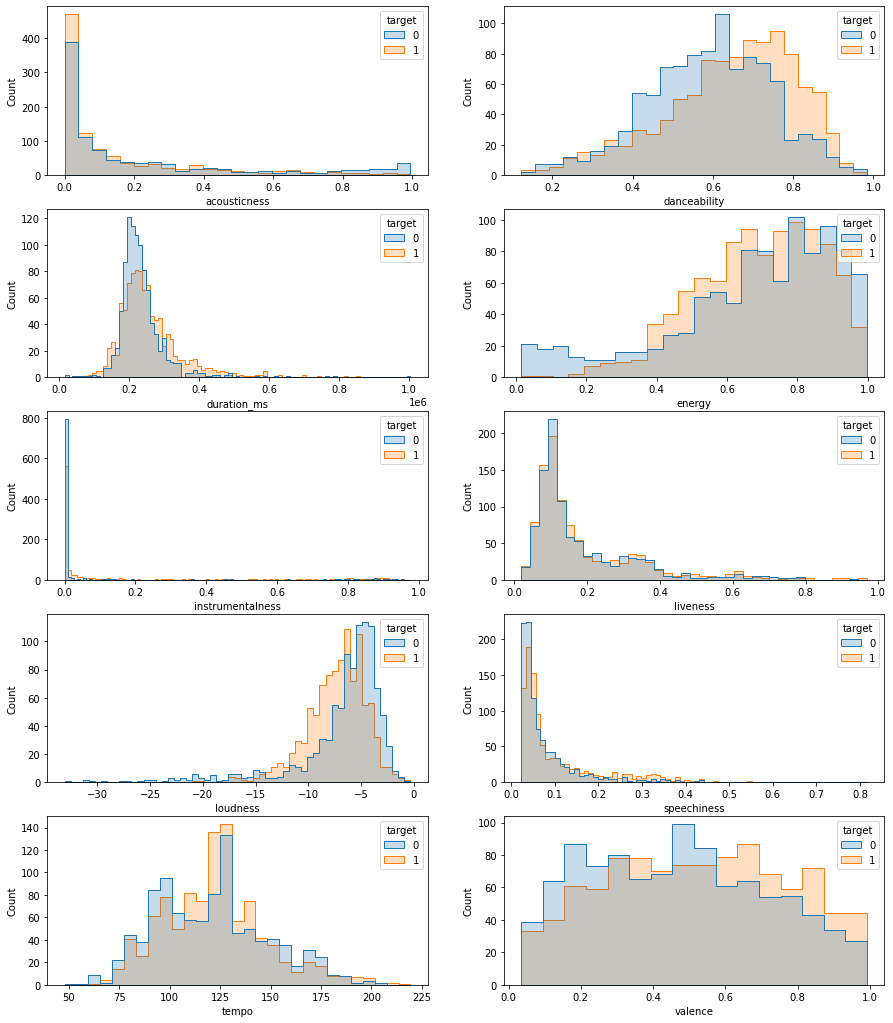

In [4]:
names = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
fig, axs = plt.subplots(5, 2)
axs = np.ravel(axs)

for i in range(len(names)):
    sns.histplot(df, x=names[i], hue="target", element="step", ax=axs[i])
    
ax = np.reshape(axs, (5, 2))
fig.set_figheight(18)
fig.set_figwidth(15)

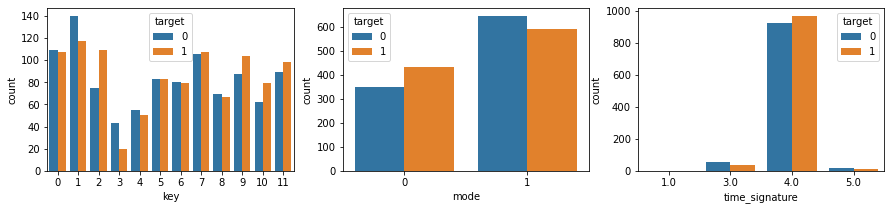

In [5]:
fig, axs = plt.subplots(1, 3)
axs = np.ravel(axs)
sns.countplot(x=df['key'], ax=axs[0], hue=df['target'])
sns.countplot(x=df['mode'], ax=axs[1], hue=df['target'])
sns.countplot(x=df['time_signature'], ax=axs[2], hue=df['target'])

ax = np.reshape(axs, (1, 3))
fig.set_figheight(3)
fig.set_figwidth(15)

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'song_title', 'artist'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [7]:
# import the metrics class
from sklearn import metrics

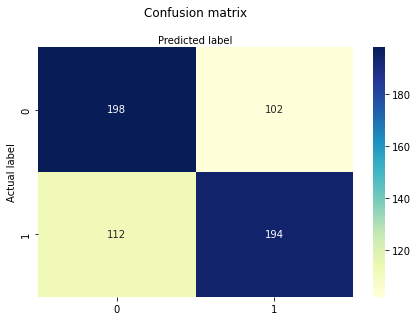

0.6468646864686468


In [8]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(random_state=123, solver='liblinear', penalty='l1')

# fit the model with data
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(y_test, y_pred))

In [9]:
y_prob = [x[1] for x in y_prob]

In [10]:
fs = []
thres = np.arange(0.2, 0.8, 0.005)
for i in thres:
    y_predd = (y_prob>i)*1
    fs.append(accuracy_score(y_test, y_predd))
b = thres[np.argmax(fs)]
y_pred = (y_prob>b)*1
print(accuracy_score(y_test, y_pred))

0.6666666666666666


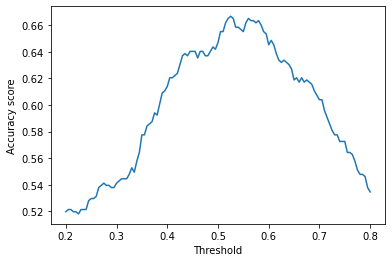

In [11]:
fig, ax = plt.subplots()
sns.lineplot(x=thres, y=fs)
plt.ylabel('Accuracy score')
plt.xlabel('Threshold')
plt.show()

In [12]:
y_prob = np.array(y_prob)

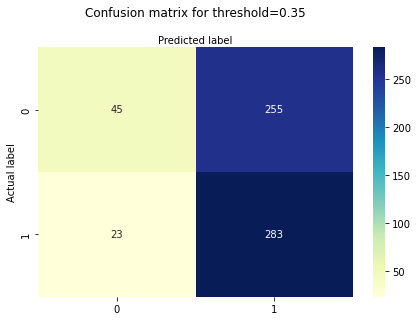

0.5412541254125413


In [13]:
y_pred = (y_prob>0.3)*1
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for threshold=0.35', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(y_test, y_pred))

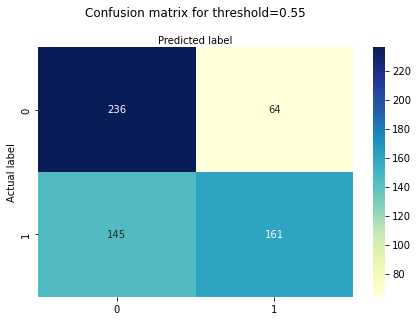

0.6551155115511551


In [14]:
y_pred = (y_prob>0.55)*1
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for threshold=0.55', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(y_test, y_pred))

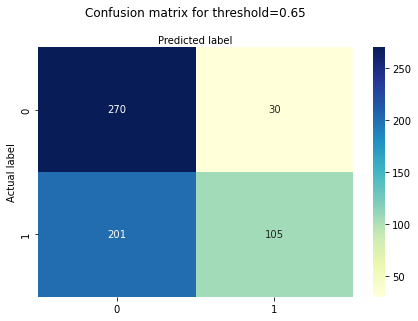

0.6188118811881188


In [15]:
y_pred = (y_prob>0.65)*1
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for threshold=0.65', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print(accuracy_score(y_test, y_pred))

In [16]:
y_pred = (y_prob>b)*1
print(accuracy_score(y_test, y_pred))

0.6666666666666666


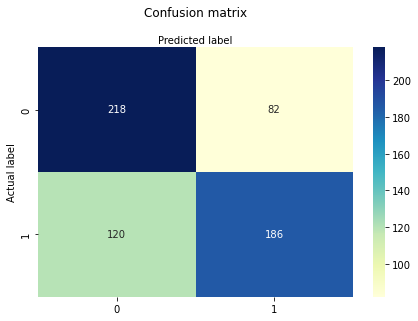

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
scores = []
for col in X.columns:
    
    X = df.drop(['target', 'song_title', 'artist'], axis=1)
    y = df['target']

    X.drop(col, axis=1, inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
    logreg = LogisticRegression(random_state=123, solver='liblinear', penalty='l1')
    # fit the model with data
    logreg.fit(X_train, y_train)
    y_prob = logreg.predict_proba(X_test)
    y_pred = logreg.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
    print(f'dropped {col}, score:{accuracy_score(y_test, y_pred)}')

dropped acousticness, score:0.6485148514851485
dropped danceability, score:0.6237623762376238
dropped duration_ms, score:0.6485148514851485
dropped energy, score:0.641914191419142
dropped instrumentalness, score:0.6468646864686468
dropped key, score:0.6534653465346535
dropped liveness, score:0.6551155115511551
dropped loudness, score:0.6485148514851485
dropped mode, score:0.6336633663366337
dropped speechiness, score:0.6221122112211221
dropped tempo, score:0.6452145214521452
dropped time_signature, score:0.6633663366336634
dropped valence, score:0.6815181518151815


In [19]:
X = df.drop(['target', 'song_title', 'artist'], axis=1)
y = df['target']

In [20]:
sc = pd.DataFrame()
sc['Dropped_feature'] = X.columns
sc['Accuracy'] = scores
sc.loc[13] = ['base_model', 0.6765676567656765]
sc['Accuracy gain'] = sc['Accuracy'] - 0.6765676567656765

In [21]:
sc.sort_values('Accuracy gain', ascending=False).reset_index(drop=True)

,Dropped_feature,Accuracy,Accuracy gain
0,valence,0.681518,0.004950
1,base_model,0.676568,0.000000
2,time_signature,0.663366,-0.013201
3,liveness,0.655116,-0.021452
4,key,0.653465,-0.023102
5,acousticness,0.648515,-0.028053
6,duration_ms,0.648515,-0.028053
7,loudness,0.648515,-0.028053
8,instrumentalness,0.646865,-0.029703
9,tempo,0.645215,-0.031353


In [27]:
X = df.drop(['target', 'song_title', 'artist'], axis=1)
y = df['target']

X.drop([ 'danceability', 'time_signature', 'mode'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)
logreg = LogisticRegression(random_state=123, solver='liblinear', penalty='l1')
# fit the model with data
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)

scores.append(accuracy_score(y_test, y_pred))
print(f"dropped {[ 'danceability', 'time_signature', 'mode', 'duration_ms', 'energy']}, score:{accuracy_score(y_test, y_pred)}")

dropped ['danceability', 'time_signature', 'mode', 'duration_ms', 'energy'], score:0.6666666666666666


In [28]:
y_prob = [x[1] for x in y_prob]
fs = []
thres = np.arange(0.5, 0.54, 0.0001)
for i in thres:
    y_predd = (y_prob>i)*1
    fs.append(accuracy_score(y_test, y_predd))
b = thres[np.argmax(fs)]
y_pred = (y_prob>b)*1
print(accuracy_score(y_test, y_pred))

0.66996699669967


In [29]:
b

0.5109999999999988